RMSE: 21.36


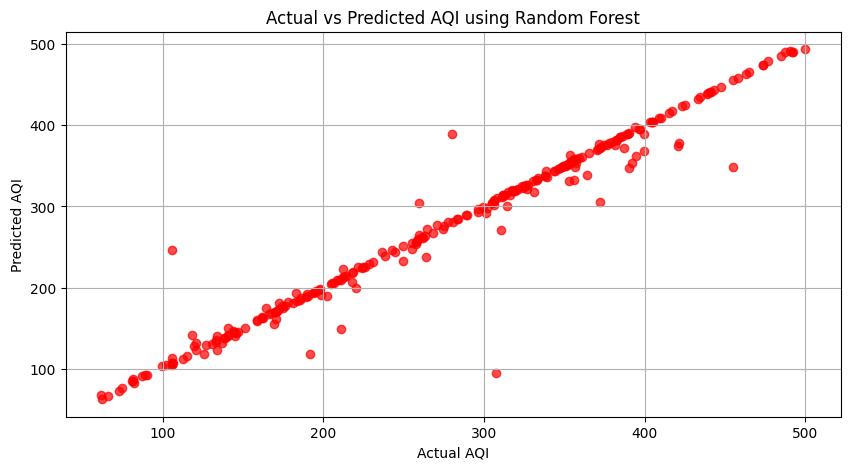

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("updated_data.csv")  # Replace with actual filename
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Fix Date Parsing Issue
df = df.sort_values(by='Date')

# Select features for Random Forest
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
df = df.dropna(subset=features + ['AQI'])  # Remove missing values

# Train-Test Split
X = df[features]
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = rf_model.predict(X_test)

# Fix RMSE Calculation
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"RMSE: {rmse:.2f}")

# Plot Actual vs Predicted AQI
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='red')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI using Random Forest")
plt.grid()
plt.show()


RMSE (XGBoost): 24.40


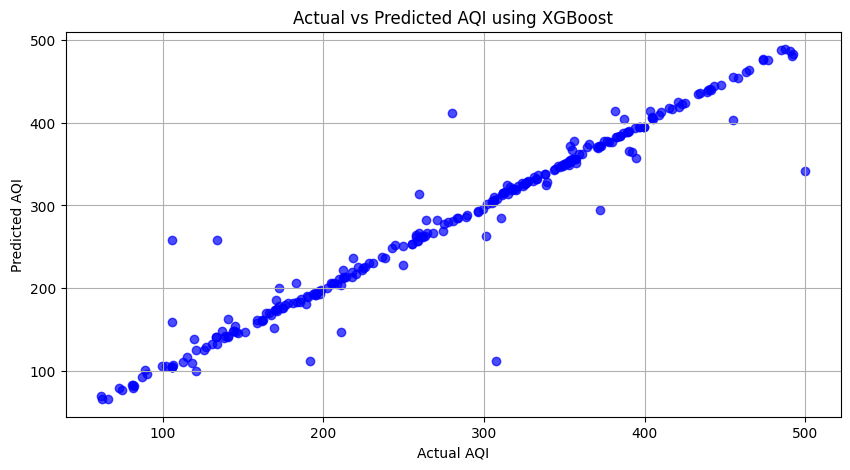

TypeError: got an unexpected keyword argument 'squared'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("updated_data.csv")  # Replace with actual filename
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Fix Date Parsing Issue
df = df.sort_values(by='Date')

# Select features for XGBoost
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
df = df.dropna(subset=features + ['AQI'])  # Remove missing values

# Train-Test Split
X = df[features]
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = xgb_model.predict(X_test)

# RMSE Calculation
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"RMSE (XGBoost): {rmse:.2f}")

# Plot Actual vs Predicted AQI
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI using XGBoost")
plt.grid()
plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("updated_data.csv")  # Replace with actual filename
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Fix Date Parsing Issue
df = df.sort_values(by='Date')

# Select features for XGBoost
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
df = df.dropna(subset=features + ['AQI'])  # Remove missing values

# Train-Test Split
X = df[features]
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict AQI
y_pred = xgb_model.predict(X_test)

# RMSE Calculation
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE (XGBoost): {rmse:.2f}")

# Convert actual and predicted values into DataFrame
result_df = pd.DataFrame({'Actual AQI': y_test.values, 'Predicted AQI': y_pred})
print("\nActual vs Predicted AQI Values:")
print(result_df.head(20))  # Display first 20 values

# Plot Actual vs Predicted AQI
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI using XGBoost")
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("updated_data.csv")  # Replace with actual filename
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Ensure correct date format
df = df.sort_values(by='Date')

# Select features for XGBoost
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
df = df.dropna(subset=features + ['AQI'])  # Remove missing values

# Train-Test Split
X = df[features]
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model with optimized parameters
xgb_model = XGBRegressor(
    n_estimators=300,        # More trees
    learning_rate=0.05,      # Slower learning for better accuracy
    max_depth=6,             # Moderate tree depth
    subsample=0.8,           # Sample 80% of data to reduce overfitting
    colsample_bytree=0.8,    # Use 80% of features per tree
    min_child_weight=2,      # Minimum leaf weight to prevent overfitting
    random_state=42
)



# Initialize XGBRegressor
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model with early stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse",
    early_stopping_rounds=20,
    verbose=False
)



# Predict AQI values
y_pred = xgb_model.predict(X_test)

# Convert actual and predicted values into DataFrame
result_df = pd.DataFrame({'Actual AQI': y_test.values, 'Predicted AQI': y_pred})
print("\n🔹 Actual vs Predicted AQI Values:")
print(result_df.head(20))  # Display first 20 values

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE: {rmse:.2f}")

# Display Predicted vs Actual AQI
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label="Predicted AQI")
plt.plot(y_test, y_test, color='red', linestyle="dashed", label="Ideal Line")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI using XGBoost")
plt.legend()
plt.grid()
plt.show()



TypeError: XGBModel.fit() got an unexpected keyword argument 'eval_metric'

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("updated_data.csv")

# Extract AQI values
if 'AQI' not in df.columns:
    raise KeyError("Column 'AQI' not found in the dataset. Check the CSV file.")

aqi_data = df['AQI'].values

# Normalize AQI values
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data.reshape(-1, 1))

# Function to create sequences of 17 past AQI values as input and the next AQI value as output
def create_sequences(data, seq_length=17):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create input-output sequences
X, y = create_sequences(aqi_scaled, seq_length=17)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(17, 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Implement EarlyStopping to monitor validation loss and stop training when it stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f"LSTM Model - MSE: {test_loss:.2f}, MAE: {test_mae:.2f}")

# Predict on test data
y_pred = model.predict(X_test)

# Reverse normalization
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Calculate R2 Score
r2 = r2_score(y_test_actual, y_pred_actual)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted AQI values
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual AQI")
plt.plot(y_pred_actual, label="Predicted AQI", linestyle='dashed')
plt.xlabel("Time Steps")
plt.ylabel("AQI")
plt.legend()
plt.title("Actual vs Predicted AQI using LSTM")
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'updated_data.csv'

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.1275 - mae: 0.2821 - val_loss: 0.0462 - val_mae: 0.1929
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0375 - mae: 0.1545 - val_loss: 0.0422 - val_mae: 0.1816
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0345 - mae: 0.1459 - val_loss: 0.0403 - val_mae: 0.1746
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0354 - mae: 0.1461 - val_loss: 0.0388 - val_mae: 0.1683
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0338 - mae: 0.1431 - val_loss: 0.0384 - val_mae: 0.1667
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0363 - mae: 0.1471 - val_loss: 0.0414 - val_mae: 0.1766
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0367 - mae: 0.1498 - val_loss: 0.0398 - val_mae: 0.1724
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0350 - mae: 0.1472 - val_loss: 0.0366 - val_mae: 0.1606
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0358 -

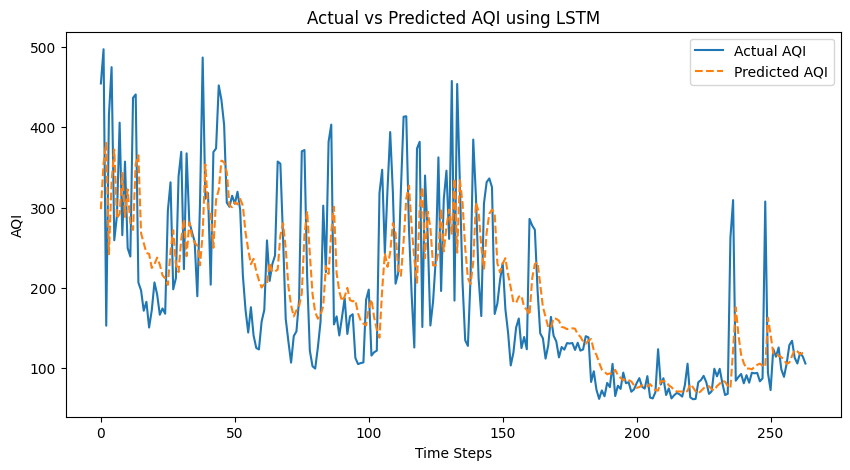

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# Load dataset
df = pd.read_csv("updated_data.csv")

# Extract AQI values
if 'AQI' not in df.columns:
    raise KeyError("Column 'AQI' not found in the dataset. Check the CSV file.")

aqi_data = df['AQI'].values

# Normalize AQI values
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data.reshape(-1, 1))

# Function to create sequences of 17 past AQI values as input and the next AQI value as output
def create_sequences(data, seq_length=17):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create input-output sequences
X, y = create_sequences(aqi_scaled, seq_length=17)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(17, 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Implement EarlyStopping to monitor validation loss and stop training when it stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f"LSTM Model - MSE: {test_loss:.2f}, MAE: {test_mae:.2f}")

# Predict on test data
y_pred = model.predict(X_test)

# Reverse normalization
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)



# Calculate R2 Score
r2 = r2_score(y_test_actual, y_pred_actual)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted AQI values
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual AQI")
plt.plot(y_pred_actual, label="Predicted AQI", linestyle='dashed')
plt.xlabel("Time Steps")
plt.ylabel("AQI")
plt.legend()
plt.title("Actual vs Predicted AQI using LSTM")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1336 - mae: 0.2900 - val_loss: 0.0461 - val_mae: 0.1923
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0354 - mae: 0.1495 - val_loss: 0.0386 - val_mae: 0.1678
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0354 - mae: 0.1487 - val_loss: 0.0392 - val_mae: 0.1703
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0338 - mae: 0.1435 - val_loss: 0.0368 - val_mae: 0.1587
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0352 - mae: 0.1459 - val_loss: 0.0395 - val_mae: 0.1709
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0338 - mae: 0.1429 - val_loss: 0.0407 - val_mae: 0.1754
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0337 - mae: 0.1421 - val_loss: 0.0377 - val_mae: 0.1651
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0361 - mae: 0.1483 - val_loss: 0.0384 - val_mae: 0.1678
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - lo

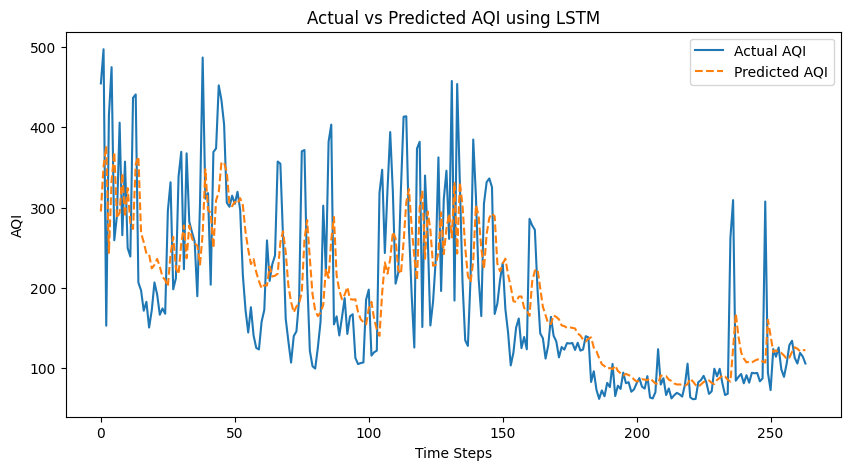

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# Load dataset
df = pd.read_csv("updated_data.csv")

# Extract AQI values
if 'AQI' not in df.columns:
    raise KeyError("Column 'AQI' not found in the dataset. Check the CSV file.")

aqi_data = df['AQI'].values

# Normalize AQI values
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data.reshape(-1, 1))

# Function to create sequences of 17 past AQI values as input and the next AQI value as output
def create_sequences(data, seq_length=17):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create input-output sequences
X, y = create_sequences(aqi_scaled, seq_length=17)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(17, 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Implement EarlyStopping to monitor validation loss and stop training when it stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stop])


# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Reverse normalization
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1,1))

mse = mean_squared_error(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

# Evaluate the model
# test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
# print(f"LSTM Model - MSE: {test_loss:.2f}")
#  MAE: {test_mae:.2f}")

# Predict on test data
y_pred = model.predict(X_test)




# mae = mean_absolute_error(y_test_actual, y_pred_actual)
# rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))


# # Calculate R2 Score
# r2 = r2_score(y_test_actual, y_pred_actual)

# # Calculate RMSE (Root Mean Squared Error)
# rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
# Plot actual vs predicted AQI values
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual AQI")
plt.plot(y_pred_actual, label="Predicted AQI", linestyle='dashed')
plt.xlabel("Time Steps")
plt.ylabel("AQI")
plt.legend()
plt.title("Actual vs Predicted AQI using LSTM")
plt.show()


In [ ]:
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))

mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))


XGBoost Model - R2 Score: 0.3307
XGBoost Model - RMSE: 90.3306
XGBoost Model - MAE: 77.1033
XGBoost Model - MSE: 8159.6216


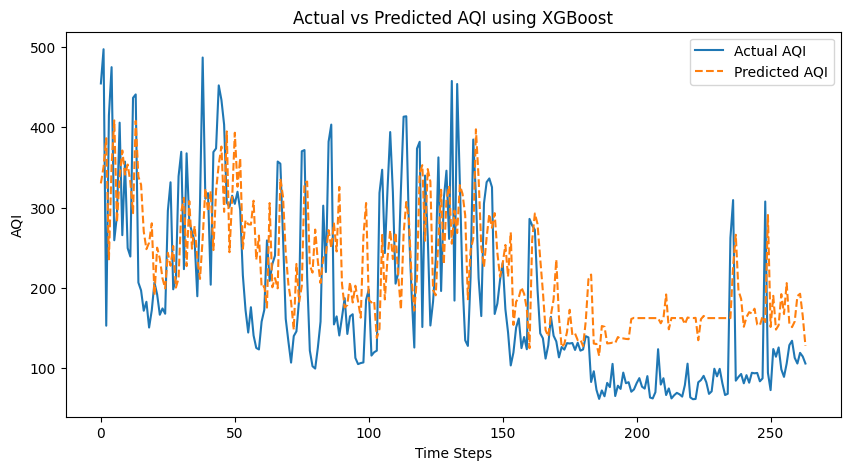

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("updated_data.csv")

# Extract AQI values
if 'AQI' not in df.columns:
    raise KeyError("Column 'AQI' not found in the dataset. Check the CSV file.")

aqi_data = df['AQI'].values

# Normalize AQI values
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data.reshape(-1, 1))

# Function to create sequences for XGBoost (requires flattening the sequences)
def create_sequences(data, seq_length=17):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length].flatten())
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create input-output sequences
X, y = create_sequences(aqi_scaled, seq_length=17)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Reverse normalization
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Evaluate model performance
r2 = r2_score(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)

print(f"XGBoost Model - R2 Score: {r2:.4f}")
print(f"XGBoost Model - RMSE: {rmse:.4f}")
print(f"XGBoost Model - MAE: {mae:.4f}")
print(f"XGBoost Model - MSE: {mse:.4f}")
# Plot actual vs predicted AQI values
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label="Actual AQI")
plt.plot(y_pred_actual, label="Predicted AQI", linestyle='dashed')
plt.xlabel("Time Steps")
plt.ylabel("AQI")
plt.legend()
plt.title("Actual vs Predicted AQI using XGBoost")
plt.show()


In [ ]:
residuals_lstm = y_test_actual - y_pred_actual
residuals_xgb = y_test_actual - y_pred_actual_xgb

plt.figure(figsize=(10, 5))
plt.plot(residuals_lstm, label="LSTM Residuals")
plt.plot(residuals_xgb, label="XGBoost Residuals", linestyle='dashed')
plt.legend()
plt.title("Residual Comparison: LSTM vs XGBoost")
plt.show()


NameError: name 'y_pred_actual_xgb' is not defined

In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("updated_data.csv")

# Extract AQI values
if 'AQI' not in df.columns:
    raise KeyError("Column 'AQI' not found in the dataset. Check the CSV file.")

aqi_data = df['AQI'].values

# Normalize AQI values
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data.reshape(-1, 1))

# Function to create sequences of 17 past AQI values as input and the next AQI value as output
def create_sequences(data, seq_length=17):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create input-output sequences
X, y = create_sequences(aqi_scaled, seq_length=17)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(17, 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Implement EarlyStopping to monitor validation loss and stop training when it stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f"LSTM Model - MSE: {test_loss:.2f}, MAE: {test_mae:.2f}")

# Predict on test data
y_pred = model.predict(X_test)

# Reverse normalization
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Plot actual vs predicted AQI values
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual AQI")
plt.plot(y_pred_actual, label="Predicted AQI", linestyle='dashed')
plt.xlabel("Time Steps")
plt.ylabel("AQI")
plt.legend()
plt.title("Actual vs Predicted AQI using LSTM")
plt.show()

# Save the trained LSTM model
model.save("lstm_aqi_model.keras")
from tensorflow.keras.models import load_model

# Load the saved LSTM model
model = load_model("lstm_aqi_model.keras")

#hyperparameter tuning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras_tuner.tuners import RandomSearch
# import keras_tuner as kt  # Optional: Short alias for easier usage

from keras_tuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   return_sequences=True, input_shape=(17, 1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32)))
    model.add(Dense(1))

    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Try 10 different combinations
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='AQI_LSTM'
)

tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_test, y_test),
             callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")


#checking the accuracy of tuned model
# Load the best model after tuning
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on test data
test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=2)
print(f"Tuned LSTM Model - MSE: {test_loss:.4f}, MAE: {test_mae:.4f}")

# Predict AQI values using the best model
y_pred = best_model.predict(X_test)

# Reverse normalization to get actual AQI values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Compute R² Score & RMSE
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"Tuned Model - R2 Score: {r2:.4f}")
print(f"Tuned Model - RMSE: {rmse:.4f}")

# Plot Actual vs Predicted AQI values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual AQI")
plt.plot(y_pred_actual, label="Predicted AQI", linestyle='dashed')
plt.xlabel("Time Steps")
plt.ylabel("AQI")
plt.legend()
plt.title("Actual vs Predicted AQI using Tuned LSTM Model")
plt.show()



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-8a625177ce29>", line 5, in <cell line: 0>
    from tensorflow.keras.models import Sequential
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/__init__.py", line 55, in <module>
    from tensorflow._api.v2 import compat
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/__init__.py", line 8, in <module>
    from tensorflow._api.v2.compat import v1
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/__init__.py", line 30, in <module>
    from tensorflow._api.v2.compat.v1 import compat
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/compat/__init__.py", line 8, in <module>
    from tensorflow._api.v2.compat.v1.compat import v1
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_a

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-8a625177ce29>", line 5, in <cell line: 0>
    from tensorflow.keras.models import Sequential
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/__init__.py", line 55, in <module>
    from tensorflow._api.v2 import compat
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/__init__.py", line 8, in <module>
    from tensorflow._api.v2.compat import v1
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/__init__.py", line 30, in <module>
    from tensorflow._api.v2.compat.v1 import compat
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_api/v2/compat/v1/compat/__init__.py", line 8, in <module>
    from tensorflow._api.v2.compat.v1.compat import v1
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/_a

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("updated_data.csv")

# Remove COVID lockdown phase (Assuming lockdown starts from a specific date)
lockdown_start_date = "2020-03-24"  # Adjust based on your dataset
df = df[df['Date'] < lockdown_start_date]  # Keep only pre-lockdown data

# Extract AQI values
aqi_data = df['AQI'].values

# Normalize AQI values using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data.reshape(-1, 1))

# Select the last 17 AQI values before lockdown
latest_aqi = aqi_data[-17:]  # Last 17 non-lockdown AQI values

# Normalize latest AQI values
latest_aqi_scaled = scaler.transform(latest_aqi.reshape(-1, 1))

# Reshape for LSTM input (1 sample, 17 timesteps, 1 feature)
latest_aqi_scaled = latest_aqi_scaled.reshape(1, 17, 1)

# Load the trained LSTM model
model = load_model("lstm_aqi_model.keras")  # Ensure model is saved before loading

# Predict today's AQI
predicted_aqi_scaled = model.predict(latest_aqi_scaled)

# Convert back to actual AQI value
predicted_aqi = scaler.inverse_transform(predicted_aqi_scaled)

print(f"🔹 Predicted AQI for today: {predicted_aqi[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
🔹 Predicted AQI for today: 112.06


In [ ]:
#2027 prediction
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Load dataset
df = pd.read_csv("updated_data.csv")

# Remove COVID lockdown phase
lockdown_start_date = "2020-03-24"
df = df[df['Date'] < lockdown_start_date]

# Extract AQI values
aqi_data = df['AQI'].values

# Normalize AQI values
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data.reshape(-1, 1))

# Select last 17 AQI values before lockdown
latest_aqi = aqi_data[-17:]

# Normalize latest AQI values
latest_aqi_scaled = scaler.transform(latest_aqi.reshape(-1, 1))
latest_aqi_scaled = latest_aqi_scaled.reshape(1, 17, 1)

# Load trained LSTM model
model = load_model("lstm_aqi_model.keras")

# Define prediction target: January 1st to January 5th, 2027
start_date = datetime(2027, 1, 1)
end_date = datetime(2027, 1, 5)

# Generate the list of dates
future_dates = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Function to predict AQI step-by-step
def predict_aqi_future(days_to_predict):
    temp_input = latest_aqi_scaled.copy()
    predictions = []

    for _ in range(days_to_predict):
        predicted_aqi_scaled = model.predict(temp_input, verbose=0)
        predicted_aqi = scaler.inverse_transform(predicted_aqi_scaled)[0, 0]
        predictions.append(predicted_aqi)

        # Shift input window and append new prediction
        temp_input = np.roll(temp_input, -1, axis=1)
        temp_input[0, -1, 0] = predicted_aqi_scaled[0, 0]

    return predictions

# Predict AQI for January 1-5, 2027
days_ahead_2027 = (start_date - datetime(2020, 3, 24)).days  # Days from the last known AQI
aqi_predictions_2027 = predict_aqi_future(5)

# Print results
print("\n🔹 Predicted AQI for January 1-5, 2027:")
for date, aqi in zip(future_dates, aqi_predictions_2027):
    print(f"{date.strftime('%Y-%m-%d')}: {aqi:.2f}")



🔹 Predicted AQI for January 1-5, 2027:
2027-01-01: 112.06
2027-01-02: 113.68
2027-01-03: 115.57
2027-01-04: 117.37
2027-01-05: 119.30


In [ ]:
#2030
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
import random

# Load dataset
df = pd.read_csv("updated_data.csv")

# Remove COVID lockdown phase
lockdown_start_date = "2020-03-24"
df = df[df['Date'] < lockdown_start_date]

# Extract AQI values
aqi_data = df['AQI'].values

# Normalize AQI values
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data.reshape(-1, 1))

# Select last 17 AQI values before lockdown
latest_aqi = aqi_data[-17:]

# Normalize latest AQI values
latest_aqi_scaled = scaler.transform(latest_aqi.reshape(-1, 1))
latest_aqi_scaled = latest_aqi_scaled.reshape(1, 17, 1)

# Load trained LSTM model
model = load_model("lstm_aqi_model.keras")

# Define target dates
dates_2025 = [datetime(2025, 3, i) for i in range(15, 20)]
dates_2030 = [datetime(2030, random.randint(1, 12), random.randint(1, 28)) for _ in range(5)]
all_dates = dates_2025 + dates_2030

# Function to predict AQI step-by-step
def predict_aqi_future(days_to_predict):
    temp_input = latest_aqi_scaled.copy()
    predictions = []

    for _ in range(days_to_predict):
        predicted_aqi_scaled = model.predict(temp_input, verbose=0)  # Fast execution
        predicted_aqi = scaler.inverse_transform(predicted_aqi_scaled)[0, 0]

        predictions.append(predicted_aqi)

        # Shift input window and append new prediction
        temp_input = np.roll(temp_input, -1, axis=1)
        temp_input[0, -1, 0] = predicted_aqi_scaled[0, 0]  # Maintain shape

    return predictions

# Predict AQI for selected dates
aqi_predictions = predict_aqi_future(len(all_dates))

# Print results
print("\n🔹 Predicted AQI for Selected Dates:")
for date, aqi in zip(all_dates, aqi_predictions):
    print(f"{date.strftime('%Y-%m-%d')}: {aqi:.2f}")



🔹 Predicted AQI for Selected Dates:
2025-03-15: 112.06
2025-03-16: 113.68
2025-03-17: 115.57
2025-03-18: 117.37
2025-03-19: 119.30
2030-04-11: 120.91
2030-02-24: 122.57
2030-10-04: 123.89
2030-03-07: 125.11
2030-04-12: 126.25


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
#hyperparameter tuning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras_tuner.tuners import RandomSearch
# import keras_tuner as kt  # Optional: Short alias for easier usage

from keras_tuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   return_sequences=True, input_shape=(17, 1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32)))
    model.add(Dense(1))

    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Try 10 different combinations
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='AQI_LSTM'
)

tuner.search(X_train, y_train,
             epochs=50,
             validation_data=(X_test, y_test),
             callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")


Trial 2 Complete [00h 00m 59s]
val_loss: 0.02933574467897415

Best val_loss So Far: 0.02919098734855652
Total elapsed time: 00h 02m 55s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
32                |128               |units

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1601 - mae: 0.3312 - val_loss: 0.0400 - val_mae: 0.1696
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0399 - mae: 0.1604 - val_loss: 0.0423 - val_mae: 0.1829
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0360 - mae: 0.1485 - val_loss: 0.0418 - val_mae: 0.1806
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0348 - mae: 0.1466 - val_loss: 0.0412 - val_mae: 0.1782
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0345 - mae: 0.1467 - val_loss: 0.0382 - val_mae: 0.1658
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0367 - mae: 0.1502 - val_loss: 0.0405 - val_mae: 0.1759
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
import numpy as np

# Select the last 17 AQI values (replace these with the latest real values)
latest_aqi = np.array([106, 97, 119, 104, 121, 89, 132, 115, 145, 132,
                        163, 163, 156, 133, 165, 163, 163])  # Convert list to NumPy array

# Normalize using the same MinMaxScaler
latest_aqi_scaled = scaler.transform(latest_aqi.reshape(-1, 1))

# Reshape for LSTM input (1 sample, 17 timesteps, 1 feature)
latest_aqi_scaled = latest_aqi_scaled.reshape(1, 17, 1)

# Predict today's AQI
predicted_aqi_scaled = model.predict(latest_aqi_scaled)

# Convert back to actual AQI value
predicted_aqi = scaler.inverse_transform(predicted_aqi_scaled)

print(f"🔹 Predicted AQI for today: {predicted_aqi[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
🔹 Predicted AQI for today: 152.30


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("updated_data.csv")

# Remove COVID lockdown phase (Assuming lockdown starts from a specific date)
lockdown_start_date = "2020-03-24"  # Adjust based on your dataset
df = df[df['Date'] < lockdown_start_date]  # Keep only pre-lockdown data

# Extract AQI values
aqi_data = df['AQI'].values

# Normalize AQI values using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data.reshape(-1, 1))

# Select the last 17 AQI values before lockdown
latest_aqi = aqi_data[-17:]  # Last 17 non-lockdown AQI values

# Normalize latest AQI values
latest_aqi_scaled = scaler.transform(latest_aqi.reshape(-1, 1))

# Reshape for LSTM input (1 sample, 17 timesteps, 1 feature)
latest_aqi_scaled = latest_aqi_scaled.reshape(1, 17, 1)

# Load the trained LSTM model
model = load_model("lstm_aqi_model.h5")  # Ensure model is saved before loading

# Predict today's AQI
predicted_aqi_scaled = model.predict(latest_aqi_scaled)

# Convert back to actual AQI value
predicted_aqi = scaler.inverse_transform(predicted_aqi_scaled)

print(f"🔹 Predicted AQI for today: {predicted_aqi[0][0]:.2f}")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'lstm_aqi_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

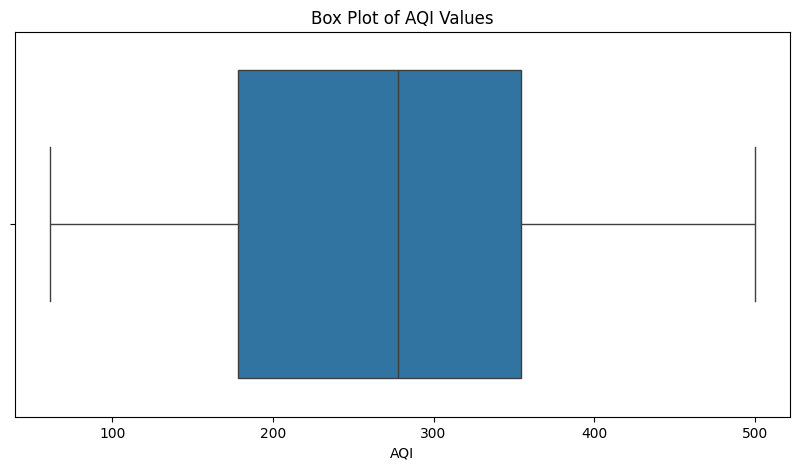

Number of Outliers: 0
Empty DataFrame
Columns: [City, Date, PM2.5, PM10, NO, NO2, NOx, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, AQI_Bucket]
Index: []
Number of Outliers: 0
Empty DataFrame
Columns: [AQI, Z_Score]
Index: []


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a box plot for AQI values
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['AQI'])
plt.title("Box Plot of AQI Values")
plt.show()

Q1 = df['AQI'].quantile(0.25)  # 25th percentile
Q3 = df['AQI'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['AQI'] < lower_bound) | (df['AQI'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")
print(outliers)  # Print the outlier rows

from scipy.stats import zscore

df['Z_Score'] = zscore(df['AQI'])
outliers = df[(df['Z_Score'] > 3) | (df['Z_Score'] < -3)]

print(f"Number of Outliers: {len(outliers)}")
print(outliers[['AQI', 'Z_Score']])


Epoch 1/100


<ipython-input-22-06001c7bb2e0>:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0902 - mae: 0.2356 - val_loss: 0.0554 - val_mae: 0.1975
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0445 - mae: 0.1667 - val_loss: 0.0489 - val_mae: 0.1835
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0449 - mae: 0.1671 - val_loss: 0.0490 - val_mae: 0.1842
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0418 - mae: 0.1598 - val_loss: 0.0549 - val_mae: 0.1963
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0425 - mae: 0.1601 - val_loss: 0.0472 - val_mae: 0.1789
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0441 - mae: 0.1644 - val_loss: 0.0473 - val_mae: 0.1786
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0462 - mae: 0.1666 - val_loss: 0.0547 - val_mae: 0.1962
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0457 - mae: 0.1686 - val_loss: 0.0456 - val_mae: 0.1752
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0408 -

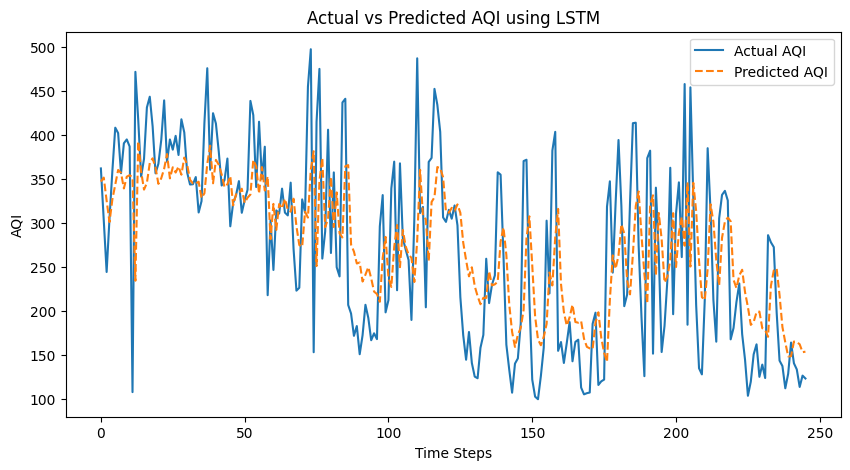

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("updated_data.csv")
# Convert 'date' column to datetime format (if not already in datetime format)
df['Date'] = pd.to_datetime(df['Date'])

# Filter dataset to keep only rows before April 2020
df = df[df['Date'] < '2020-04-01']

# Drop any remaining NaN values (if required)
df = df.dropna()

# Extract AQI values
if 'AQI' not in df.columns:
    raise KeyError("Column 'AQI' not found in the dataset. Check the CSV file.")

aqi_data = df['AQI'].values

# Normalize AQI values
scaler = MinMaxScaler(feature_range=(0, 1))
aqi_scaled = scaler.fit_transform(aqi_data.reshape(-1, 1))

# Function to create sequences of 17 past AQI values as input and the next AQI value as output
def create_sequences(data, seq_length=17):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create input-output sequences
X, y = create_sequences(aqi_scaled, seq_length=17)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(17, 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Implement EarlyStopping to monitor validation loss and stop training when it stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f"LSTM Model - MSE: {test_loss:.2f}, MAE: {test_mae:.2f}")

# Predict on test data
y_pred = model.predict(X_test)

# Reverse normalization
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Plot actual vs predicted AQI values
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual AQI")
plt.plot(y_pred_actual, label="Predicted AQI", linestyle='dashed')
plt.xlabel("Time Steps")
plt.ylabel("AQI")
plt.legend()
plt.title("Actual vs Predicted AQI using LSTM")
plt.show()


XGBoost Model - MSE: 7909.69, MAE: 67.27, R2: 0.34


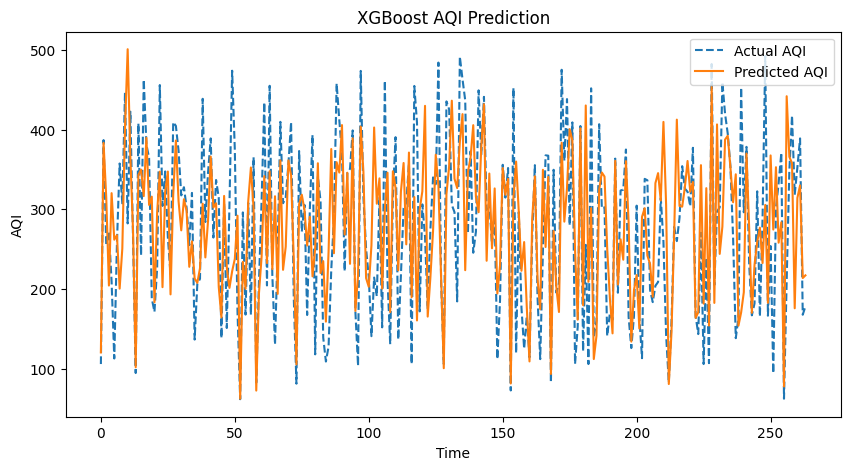

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Create lagged features (past 17 AQI values as features)
df = pd.DataFrame(aqi_data, columns=["AQI"])
for i in range(1, 18):
    df[f"AQI_lag_{i}"] = df["AQI"].shift(i)

df.dropna(inplace=True)

# Split into features (X) and target (y)
X_xgb = df.drop(columns=["AQI"])
y_xgb = df["AQI"]

# Train-test split (80% train, 20% test)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate model
mse_xgb = mean_squared_error(y_test_xgb, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test_xgb, y_pred_xgb)
r2_xgb = r2_score(y_test_xgb, y_pred_xgb)

print(f"XGBoost Model - MSE: {mse_xgb:.2f}, MAE: {mae_xgb:.2f}, R2: {r2_xgb:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test_xgb.values, label="Actual AQI", linestyle="dashed")
plt.plot(y_pred_xgb, label="Predicted AQI")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.legend()
plt.title("XGBoost AQI Prediction")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 🔹 Load Dataset
df = pd.read_csv("updated_data.csv")

# 🔹 Feature Engineering: Add rolling mean & rolling standard deviation
df["AQI_rolling_mean"] = df["AQI"].rolling(window=5).mean()
df["AQI_rolling_std"] = df["AQI"].rolling(window=5).std()

# 🔹 Drop NaN values created by rolling functions
df.dropna(inplace=True)

# 🔹 Define Features and Target Variable
X = df.drop(columns=["AQI"])  # Use all features except AQI
y = df["AQI"]  # Target variable

# 🔹 Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Encode Categorical Features
le_city = LabelEncoder()
le_aqi_bucket = LabelEncoder()

X_train["City"] = le_city.fit_transform(X_train["City"])
X_train["AQI_Bucket"] = le_aqi_bucket.fit_transform(X_train["AQI_Bucket"])
X_test["City"] = le_city.transform(X_test["City"])
X_test["AQI_Bucket"] = le_aqi_bucket.transform(X_test["AQI_Bucket"])

# 🔹 Drop Date Column (Not Useful for XGBoost)
X_train = X_train.drop(columns=["Date"])
X_test = X_test.drop(columns=["Date"])

# 🔹 Ensure All Columns are Numeric
print(X_train.dtypes)

# 🔹 Initialize XGBoost Regressor
xgb = XGBRegressor(tree_method='gpu_hist')  # Remove 'gpu_hist' if using CPU

# 🔹 Hyperparameter Grid (Reduced for Faster Search)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8]
}

# 🔹 Use RandomizedSearchCV (Faster than GridSearchCV)
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_grid,
    n_iter=10,  # Search only 10 random sets
    cv=2, scoring='neg_mean_squared_error',
    verbose=1, n_jobs=-1, random_state=42
)

# 🔹 Train the Model
random_search.fit(X_train, y_train)

# 🔹 Best Parameters
print("Best Hyperparameters:", random_search.best_params_)

# 🔹 Make Predictions
y_pred = random_search.best_estimator_.predict(X_test)

# 🔹 Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"XGBoost Model - MSE: {mse:.4f}, MAE: {mae:.4f}")


City                  int64
PM2.5               float64
PM10                float64
NO                  float64
NO2                 float64
NOx                 float64
CO                  float64
SO2                 float64
O3                  float64
Benzene             float64
Toluene             float64
Xylene              float64
AQI_Bucket            int64
AQI_rolling_mean    float64
AQI_rolling_std     float64
dtype: object
Fitting 2 folds for each of 8 candidates, totalling 16 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ValueError: 
All the 16 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1170, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 2100, in update
    _check_call(
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [12:05:15] /workspace/src/tree/updater_gpu_hist.cu:861: Exception in gpu_hist: [12:05:15] /workspace/src/tree/updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7b0261c5c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xe2d2dd) [0x7b026282d2dd]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xe3b814) [0x7b026283b814]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ad006) [0x7b0261fad006]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ae3d4) [0x7b0261fae3d4]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5f8cd8) [0x7b0261ff8cd8]
  [bt] (6) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6f) [0x7b0261b65a1f]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7b028aefae2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7b028aef7493]



Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7b0261c5c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xe3ba0b) [0x7b026283ba0b]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ad006) [0x7b0261fad006]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ae3d4) [0x7b0261fae3d4]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5f8cd8) [0x7b0261ff8cd8]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6f) [0x7b0261b65a1f]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7b028aefae2e]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7b028aef7493]
  [bt] (8) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x7b028b4c64d8]



--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1170, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 2100, in update
    _check_call(
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [12:05:15] /workspace/src/tree/updater_gpu_hist.cu:861: Exception in gpu_hist: [12:05:15] /workspace/src/tree/updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x791a5a85c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xe2d2dd) [0x791a5b42d2dd]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xe3b814) [0x791a5b43b814]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ad006) [0x791a5abad006]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ae3d4) [0x791a5abae3d4]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5f8cd8) [0x791a5abf8cd8]
  [bt] (6) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6f) [0x791a5a765a1f]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x791a83ecae2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x791a83ec7493]



Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x791a5a85c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xe3ba0b) [0x791a5b43ba0b]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ad006) [0x791a5abad006]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ae3d4) [0x791a5abae3d4]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5f8cd8) [0x791a5abf8cd8]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6f) [0x791a5a765a1f]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x791a83ecae2e]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x791a83ec7493]
  [bt] (8) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x791a83eda4d8]




In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 🔹 Load Dataset
df = pd.read_csv("updated_data.csv")

# 🔹 Feature Engineering: Add rolling mean & rolling standard deviation
df["AQI_rolling_mean"] = df["AQI"].rolling(window=5).mean()
df["AQI_rolling_std"] = df["AQI"].rolling(window=5).std()

# 🔹 Drop NaN values created by rolling functions
df.dropna(inplace=True)

# 🔹 Define Features and Target Variable
X = df.drop(columns=["AQI"])  # Use all features except AQI
y = df["AQI"]  # Target variable

# 🔹 Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Encode Categorical Features
le_city = LabelEncoder()
le_aqi_bucket = LabelEncoder()

X_train["City"] = le_city.fit_transform(X_train["City"])
X_train["AQI_Bucket"] = le_aqi_bucket.fit_transform(X_train["AQI_Bucket"])
X_test["City"] = le_city.transform(X_test["City"])
X_test["AQI_Bucket"] = le_aqi_bucket.transform(X_test["AQI_Bucket"])

# 🔹 Drop Date Column (Not Useful for XGBoost)
X_train = X_train.drop(columns=["Date"])
X_test = X_test.drop(columns=["Date"])

# 🔹 Ensure All Columns are Numeric
print(X_train.dtypes)

# 🔹 Initialize XGBoost Regressor
xgb = XGBRegressor(tree_method='gpu_hist')  # Remove 'gpu_hist' if using CPU

# 🔹 Hyperparameter Grid (Reduced for Faster Search)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8]
}

# 🔹 Use RandomizedSearchCV (Faster than GridSearchCV)
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_grid,
    n_iter=10,  # Search only 10 random sets
    cv=2, scoring='neg_mean_squared_error',
    verbose=1, n_jobs=-1, random_state=42
)

# 🔹 Train the Model
random_search.fit(X_train, y_train)

# 🔹 Best Parameters
print("Best Hyperparameters:", random_search.best_params_)

# 🔹 Make Predictions
y_pred = random_search.best_estimator_.predict(X_test)

# 🔹 Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"XGBoost Model - MSE: {mse:.4f}, MAE: {mae:.4f}")


City                  int64
PM2.5               float64
PM10                float64
NO                  float64
NO2                 float64
NOx                 float64
CO                  float64
SO2                 float64
O3                  float64
Benzene             float64
Toluene             float64
Xylene              float64
AQI_Bucket            int64
AQI_rolling_mean    float64
AQI_rolling_std     float64
dtype: object
Fitting 2 folds for each of 8 candidates, totalling 16 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ValueError: 
All the 16 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1170, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 2100, in update
    _check_call(
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:26:23] /workspace/src/tree/updater_gpu_hist.cu:861: Exception in gpu_hist: [09:26:23] /workspace/src/tree/updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7e2bd305c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xe2d2dd) [0x7e2bd3c2d2dd]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xe3b814) [0x7e2bd3c3b814]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ad006) [0x7e2bd33ad006]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ae3d4) [0x7e2bd33ae3d4]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5f8cd8) [0x7e2bd33f8cd8]
  [bt] (6) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6f) [0x7e2bd2f65a1f]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7e2bfc73ae2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7e2bfc737493]



Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7e2bd305c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xe3ba0b) [0x7e2bd3c3ba0b]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ad006) [0x7e2bd33ad006]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ae3d4) [0x7e2bd33ae3d4]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5f8cd8) [0x7e2bd33f8cd8]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6f) [0x7e2bd2f65a1f]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7e2bfc73ae2e]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7e2bfc737493]
  [bt] (8) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x7e2bfc74a4d8]



--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1170, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 2100, in update
    _check_call(
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [09:26:23] /workspace/src/tree/updater_gpu_hist.cu:861: Exception in gpu_hist: [09:26:23] /workspace/src/tree/updater_gpu_hist.cu:867: Check failed: ctx_->Ordinal() >= 0 (-1 vs. 0) : Must have at least one device
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7a4ad665c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xe2d2dd) [0x7a4ad722d2dd]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xe3b814) [0x7a4ad723b814]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ad006) [0x7a4ad69ad006]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ae3d4) [0x7a4ad69ae3d4]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5f8cd8) [0x7a4ad69f8cd8]
  [bt] (6) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6f) [0x7a4ad6565a1f]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7a4affcf6e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7a4affcf3493]



Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7a4ad665c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0xe3ba0b) [0x7a4ad723ba0b]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ad006) [0x7a4ad69ad006]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5ae3d4) [0x7a4ad69ae3d4]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5f8cd8) [0x7a4ad69f8cd8]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x6f) [0x7a4ad6565a1f]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7a4affcf6e2e]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7a4affcf3493]
  [bt] (8) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x7a4affd064d8]




In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv("updated_data.csv")

# Extract the AQI column
aqi_series = df['AQI']

# Perform Augmented Dickey-Fuller Test
adf_result = adfuller(aqi_series)

# Extract values
adf_stat = adf_result[0]
p_value = adf_result[1]
crit_values = adf_result[4]

# Print results
print("ADF Test Results:")
print(f"1] ADF Statistic: {adf_stat:.4f}")
print(f"2] p-value: {p_value:.4f}")
print("3] Critical Values:")
for key, value in crit_values.items():
    print(f"   {key}%: {value:.4f}")


ADF Test Results:
1] ADF Statistic: -2.4240
2] p-value: 0.1351
3] Critical Values:
   1%%: -3.4353
   5%%: -2.8637
   10%%: -2.5679
